In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("University_Dataset(tmc_raw_data_2020_2029).csv", parse_dates=["count_date", "start_time", "end_time"])

In [10]:
vehicle_columns = [
    "n_appr_cars_r", "n_appr_cars_t", "n_appr_cars_l", "s_appr_cars_r", "s_appr_cars_t", "s_appr_cars_l",
    "e_appr_cars_r", "e_appr_cars_t", "e_appr_cars_l", "w_appr_cars_r", "w_appr_cars_t", "w_appr_cars_l",
    "n_appr_truck_r", "n_appr_truck_t", "n_appr_truck_l", "s_appr_truck_r", "s_appr_truck_t", "s_appr_truck_l",
    "e_appr_truck_r", "e_appr_truck_t", "e_appr_truck_l", "w_appr_truck_r", "w_appr_truck_t", "w_appr_truck_l",
    "n_appr_bus_r", "n_appr_bus_t", "n_appr_bus_l", "s_appr_bus_r", "s_appr_bus_t", "s_appr_bus_l",
    "e_appr_bus_r", "e_appr_bus_t", "e_appr_bus_l", "w_appr_bus_r", "w_appr_bus_t", "w_appr_bus_l"
]

df["total_vehicles"] = df[vehicle_columns].sum(axis=1)
df["hour"] = df["start_time"].dt.hour  # Extract hour for time-based analysis

## High Congestion Times

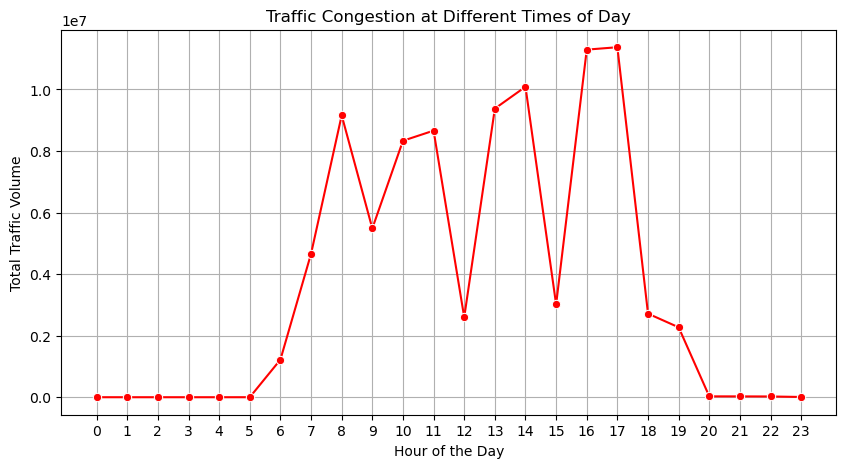

In [12]:
time_traffic = df.groupby("hour")["total_vehicles"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=time_traffic, x="hour", y="total_vehicles", marker="o", color="red")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Traffic Volume")
plt.title("Traffic Congestion at Different Times of Day")
plt.xticks(range(0, 24))
plt.grid()
plt.show()


### <span style="color:teal">Key Insights:</span>

- **<span style="color:teal">Peak Traffic Hours:</span>**  
  The highest traffic volume occurs between **16:00 (4 PM)** and **17:00 (5 PM)**, with over **11 million vehicles** recorded during these hours. This indicates significant congestion during evening rush hour.

- **<span style="color:teal">Morning Rush:</span>**  
  The **morning rush** starts around **7:00 AM**, reaching its peak at **8:00 AM**, with **9.1 million vehicles**. This is likely the result of commuter traffic.

- **<span style="color:teal">Lowest Traffic Hours:</span>**  
  The **early morning (1 AM - 4 AM)** hours have the lowest traffic volumes, with counts as low as **77 vehicles at 3 AM**, reflecting reduced activity at night.

- **<span style="color:teal">Late Evening Drop:</span>**  
  Traffic sharply declines after **6:00 PM**, with minimal vehicle counts observed after **9:00 PM**, suggesting a significant reduction in driving activity as the day ends.

### <span style="color:teal">Conclusion:</span>  
The traffic congestion follows a typical pattern with rush hours occurring in the morning and evening, while nighttime hours experience minimal activity. Efforts to optimize traffic during peak hours could help alleviate congestion during these critical times.
